In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

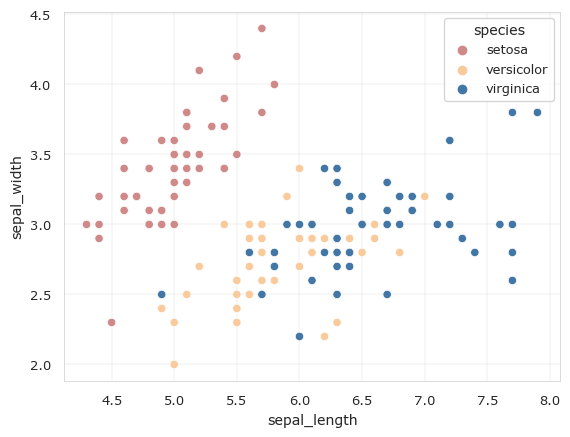

In [4]:
grey = "#eeeeee"
blue = "#4276A5"
red = "#cf8989"
cream = "#f9cb9c"
green = "#45818e"
pink = "#FF8FC3"

PALETTE = [red, cream, blue, green, pink, grey]
FONT = "Verdana"

# Set Seaborn style and color palette
sns.set(
    style="whitegrid",
    palette=PALETTE,
    context="notebook",
    font=FONT,
    font_scale=0.85,
    color_codes=True,
)

# Set Matplotlib font
mpl.rcParams["font.family"] = FONT

# Set the desired axes border linewidth
mpl.rcParams["axes.linewidth"] = 0.5
mpl.rcParams["grid.linewidth"] = 0.2

# Example Seaborn plot
iris_data = sns.load_dataset("iris")
sns.scatterplot(data=iris_data, x="sepal_length", y="sepal_width", hue="species")

In [5]:
# all data here include predicted course units

# complete info
df = pd.read_csv("../data/data_with_predicted_course_units.csv")

# contains students with no cgpa before or after
df_incomplete = pd.read_csv("../data/incomplete_cgpa_only.csv")

# only contains students with complete cgpa information
df_complete = pd.read_csv("../data/valid_cgpa_only.csv")

In [6]:
# Combine text responses into a single string for analysis
strike_text = " ".join(df["strike_effect"].dropna())
challenge_text = " ".join(df["challenge"].dropna())

In [7]:
# Sentiment analysis could involve using a library like TextBlob or VADER
# Here's a simple example using TextBlob

strike_sentiments = [
    TextBlob(text).sentiment.polarity for text in strike_text.split(".")
]
challenge_sentiments = [
    TextBlob(text).sentiment.polarity for text in challenge_text.split(".")
]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

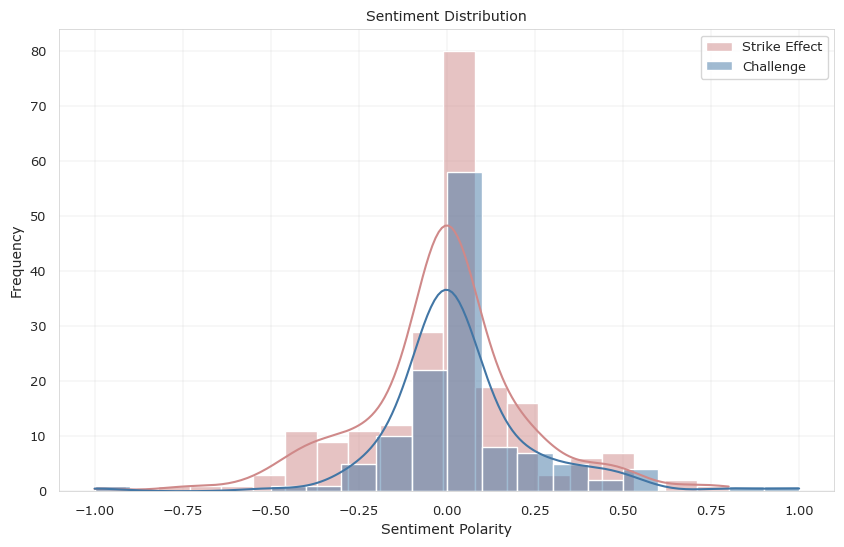

In [14]:
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(strike_sentiments, bins=20, kde=True, color=red, label="Strike Effect")
sns.histplot(challenge_sentiments, bins=20, kde=True, color=blue, label="Challenge")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [9]:
# Word frequency analysis
strike_words = " ".join(strike_text.split())
challenge_words = " ".join(challenge_text.split())
strike_word_counts = Counter(strike_words.split())
challenge_word_counts = Counter(challenge_words.split())

In [10]:
# Generate word clouds
strike_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    strike_words
)
challenge_wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate(challenge_words)

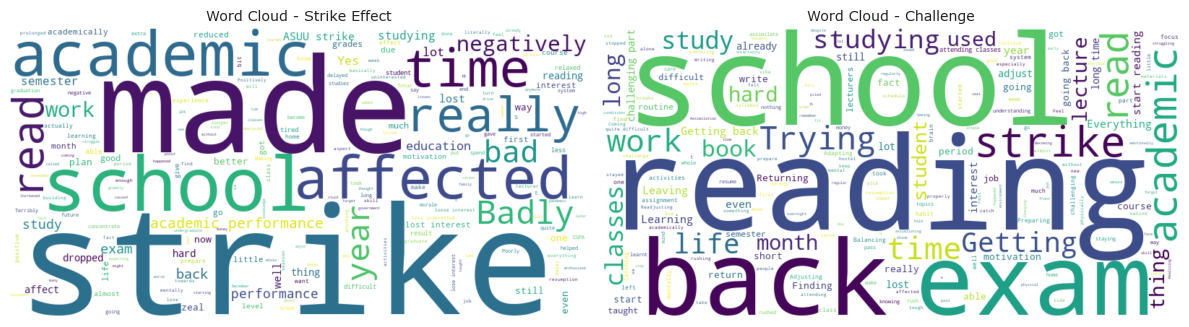

In [11]:
# Word cloud visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(strike_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Strike Effect")

plt.subplot(1, 2, 2)
plt.imshow(challenge_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Challenge")

plt.tight_layout()
plt.show()